In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=False)
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
from plotly.tools import FigureFactory as ff
import pycountry
import random
import squarify
from collections import Counter
import warnings
import seaborn as sns
sns.set_style('white')
warnings.filterwarnings('ignore')
from scipy.stats import norm
pd.options.display.float_format = "{:.2f}".format
import re
import json
import os
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS

In [3]:
data = pd.read_csv(r'Stack\survey_results_public.csv')
schema = pd.read_csv(r'Stack\survey_results_schema.csv')

In [6]:
# Funkcje

mapping = {country.name: country.alpha_3 for country in pycountry.countries}

def gender(x):
    if x not in ['Female','Male']:
        return 'Other'
    else:
        return x
    
def get_list(x):
    l = ";".join(x)
    w = l.split(";")
    w = Counter(w).most_common()
    return pd.DataFrame(w)

def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

def education(x):
    if x == 'Bachelor’s degree (BA, BS, B.Eng., etc.)':
        return 'Bachelor’s degree'
    elif x == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)':
        return 'Master’s degree'
    elif x == 'Some college/university study without earning a degree':
        return 'College - no degree'
    elif x == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        return 'Secondary school'
    elif x == 'Primary/elementary school':
        return 'Primary school'
    elif x == 'Associate degree':
        return 'Associate'
    elif x == 'Other doctoral degree (Ph.D, Ed.D., etc.)':
        return 'Doctoral'
    elif x == 'Professional degree (JD, MD, etc.)':
        return 'Professional'
    elif x == 'I never completed any formal education':
        return 'No formal education'
    else:
        return 'No info'

def undergrad(x):
    if x == 'Computer science, computer engineering, or software engineering':
        return 'Computer Science'
    elif x == 'Another engineering discipline (ex. civil, electrical, mechanical)':
        return 'Engineering (Other)'
    elif x == 'Information systems, information technology, or system administration':
        return 'Information systems'
    elif x == 'A natural science (ex. biology, chemistry, physics)' or x == 'A health science (ex. nursing, pharmacy, radiology)':
        return 'Natural Science'
    elif x == 'Mathematics or statistics':
        return 'Maths & Stats'
    elif x == 'Web development or web design':
        return 'Web dev'
    elif x == 'A business discipline (ex. accounting, finance, marketing)':
        return 'Business'
    elif x == 'A humanities discipline (ex. literature, history, philosophy)' or x == 'A social science (ex. anthropology, psychology, political science)':
        return 'Humanities & Socials'
    elif x == 'Fine arts or performing arts (ex. graphic design, music, studio art)':
        return 'Arts'
    else:
        return 'Other'
    
def emp(x):
    if x == 'Employed full-time':
        return 'Full-time job'
    elif x == 'Independent contractor, freelancer, or self-employed':
        return 'Freelancer/SelfEmployed'
    elif x == 'Not employed, but looking for work':
        return 'Unemployed (looking for work)'
    elif x == 'Employed part-time':
        return 'Part-time job'
    elif x == 'Not employed, and not looking for work':
        return 'Unemployed (not looking for work)'
    elif x == 'Retired':
        return 'Retired'
    else:
        return 'Other'
    
stopwords = set(STOPWORDS) 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=30, 
        scale=3,
        colormap = 'inferno',
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 9))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


In [7]:
data['CountryCode'] = data['Country'].apply(lambda x: mapping.get(x))
data['Gender2'] = data['Gender'].dropna().apply(gender)
data['Education'] = data['FormalEducation'].apply(education)
data['Undergrad'] = data['UndergradMajor'].apply(undergrad)
data['Employment'] = data['Employment'].apply(emp)

In [8]:
data.head(3)

Respondent Hobby OpenSource         Country Student Employment  \
0           1   Yes         No           Kenya      No      Other   
1           3   Yes        Yes  United Kingdom      No      Other   
2           4   Yes        Yes   United States      No      Other   

                            FormalEducation  \
0  Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Bachelor’s degree (BA, BS, B.Eng., etc.)   
2                          Associate degree   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology, chemistry, phy...   
2  Computer science, computer engineering, or sof...   

                CompanySize  \
0        20 to 99 employees   
1  10,000 or more employees   
2        20 to 99 employees   

                                             DevType  ...  \
0                               Full-stack developer  ...   
1  Database administrator;DevOps specialist;Full-...  ...   
2           Engineering manager;Full-stack developer  ...   

                  RaceEthnicity                Age Dependents MilitaryUS  \
0   Black or of African descent  25 - 34 years old        Yes        NaN   
1  White or of European descent  35 - 44 years old        Yes        NaN   
2                           NaN                NaN        NaN        NaN   

                          SurveyTooLong     SurveyEasy CountryCode  Gender2  \
0  The survey was an appropriate length      Very easy         KEN     Male   
1  The survey was an appropriate length  Somewhat easy         GBR     Male   
2                                   NaN            NaN         USA      NaN   

           Education         Undergrad  
0  Bachelor’s degree     Maths & Stats  
1  Bachelor’s degree   Natural Science  
2          Associate  Computer Science  

[3 rows x 133 columns]

In [9]:
data.shape

(98855, 133)

In [10]:
(data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False).head(15)

TimeAfterBootcamp            93.27
MilitaryUS                   84.04
HackathonReasons             74.01
ErgonomicDevices             65.55
AdBlockerReasons             61.82
StackOverflowJobsRecommend   61.24
JobEmailPriorities1          53.25
JobEmailPriorities6          53.25
JobEmailPriorities5          53.25
JobEmailPriorities4          53.25
JobEmailPriorities3          53.25
JobEmailPriorities2          53.25
JobEmailPriorities7          53.25
ConvertedSalary              51.75
JobContactPriorities1        50.73
dtype: float64

In [11]:
order = ['Under 18 years old','18 - 24 years old','25 - 34 years old','35 - 44 years old','45 - 54 years old',
 '55 - 64 years old','65 years or older']

# Who are the respondents - basic statistics

In [12]:
countries = ((data['Country'].value_counts()).to_frame().reset_index()).sort_values(by='Country',ascending=False)

In [13]:
countries.head(5)

index  Country
0   United States    20309
1           India    13721
2         Germany     6459
3  United Kingdom     6221
4          Canada     3393

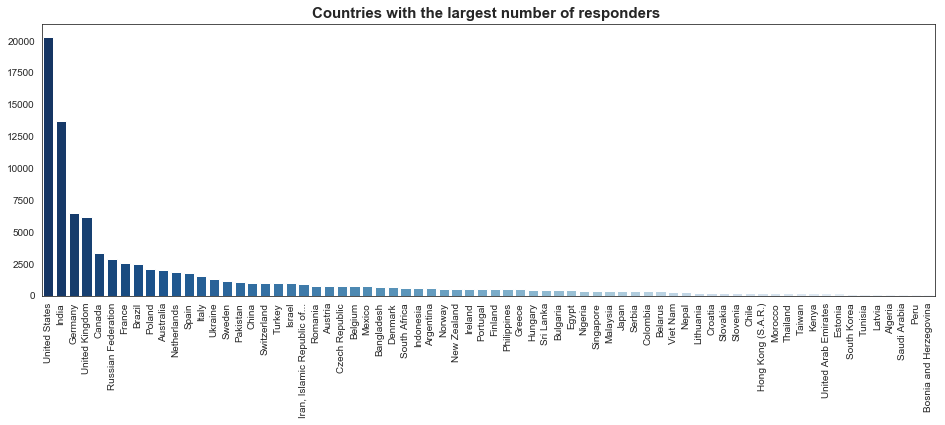

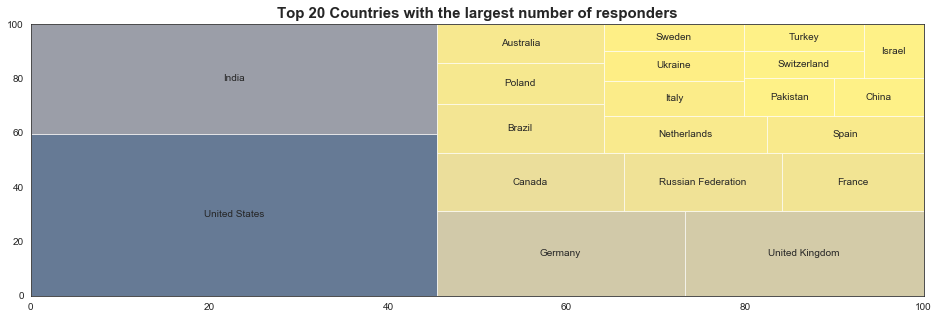

In [14]:
plt.figure(figsize=(16,5))
a = sns.countplot(data['Country'],order = data['Country'].value_counts(ascending=False).index[:70],palette='Blues_r')
plt.xticks(rotation=90);
plt.xlabel('')
plt.ylabel('')
plt.title('Countries with the largest number of responders ',fontsize=15,fontweight="bold");
plt.figure(figsize=(16,5))
norm = matplotlib.colors.Normalize(vmin=min(countries['Country'].head(20)), vmax=max(countries['Country'].head(20)))
colors = [matplotlib.cm.cividis_r(norm(value)) for value in countries['Country']]
squarify.plot(label=countries['index'].head(20),sizes=countries['Country'].head(20), color = colors, alpha=.6)
plt.title("Top 20 Countries with the largest number of responders",fontsize=15,fontweight="bold");

**We can see that most of respondents are from countries like USA, India, Germany, United Kingdom, Canada, Russia, France, Brasil and Poland**

### Gender and Age

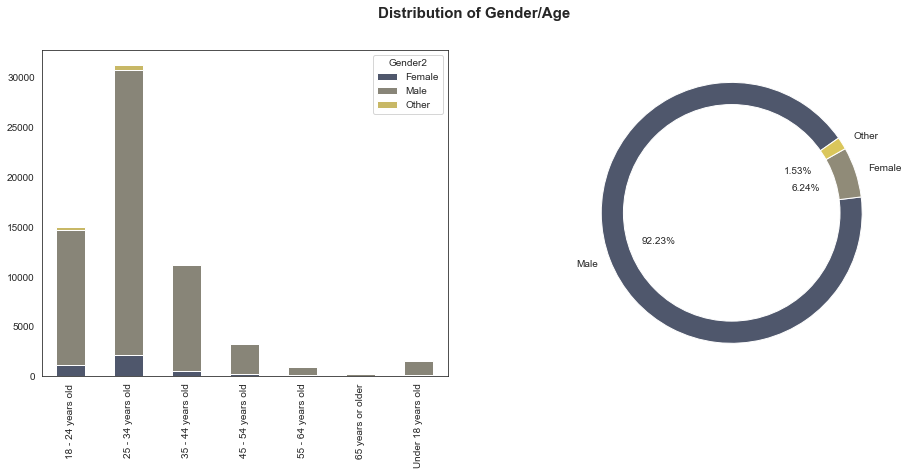

In [15]:
f, ax = plt.subplots(1,2,figsize=(16,6))
c2 = cm.cividis(np.linspace(.3,0.8, 3))
g = data.groupby(['Age','Gender2'])['Gender2'].count()
g = g.sort_values(ascending=False)
g = pd.DataFrame(g)
g = g.rename(columns={'Gender2':'counts'})
g = g.sort_values(by='counts',ascending=True)
g = g.reset_index()
g = g.pivot(index='Age',columns='Gender2',values='counts')
g.plot(kind='bar',stacked=True,color=c2,ax=ax[0])
c1 = cm.cividis(np.linspace(.3,.86, 3))
my_circle=plt.Circle( (0,0), 0.83, color='white')
names=data['Gender2'].dropna().unique().tolist()
size=data['Gender2'].value_counts().tolist()
plt.pie(size, labels=names, colors=c1,autopct='%1.2f%%',startangle=35)
p=plt.gcf()
p.gca().add_artist(my_circle);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.suptitle('Distribution of Gender/Age',fontsize=15,fontweight="bold");

**We can see that most of repondents (92%) are males. Also most of respondents are in range from 25 to 34 years old.**

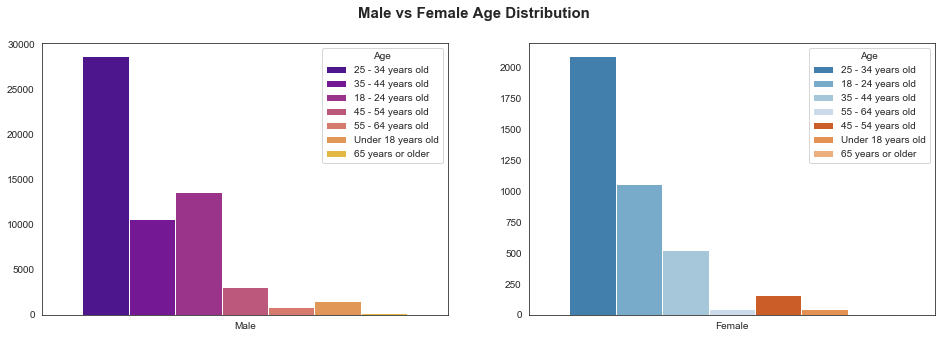

In [14]:
f,ax = plt.subplots(1,2,figsize=(16,5))
a = sns.countplot(x=data[data['Gender2']=='Male']['Gender2'],data=data[data['Gender2']=='Male'],hue='Age',palette='plasma',ax=ax[0])
b = sns.countplot(x=data[data['Gender2']=='Female']['Gender2'],data=data[data['Gender2']=='Female'],hue='Age',palette='tab20c',ax=ax[1])
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.suptitle("Male vs Female Age Distribution",fontsize=15,fontweight="bold");

**There is little difference in age distribution if we look on males and females. In both groups most of respondents are in 25-34 group. But in Males group second most numerous group is 35-44 years old, but in female group second most numerous group is 18-24 years old group. So we can say that female are younger developers ;)**

## Coding as Hobby  

In [16]:
data.groupby(['Hobby','Age'])['Hobby'].count()

Hobby  Age               
No     18 - 24 years old      2209
       25 - 34 years old      5860
       35 - 44 years old      2414
       45 - 54 years old       801
       55 - 64 years old       279
       65 years or older        43
       Under 18 years old       61
Yes    18 - 24 years old     13040
       25 - 34 years old     25899
       35 - 44 years old      9063
       45 - 54 years old      2512
       55 - 64 years old       680
       65 years or older       136
       Under 18 years old     1577
Name: Hobby, dtype: int64

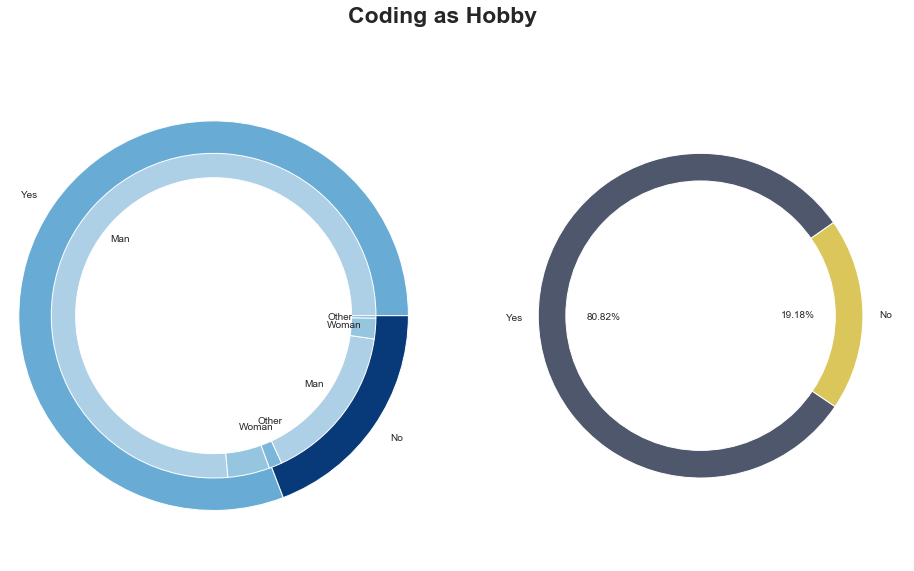

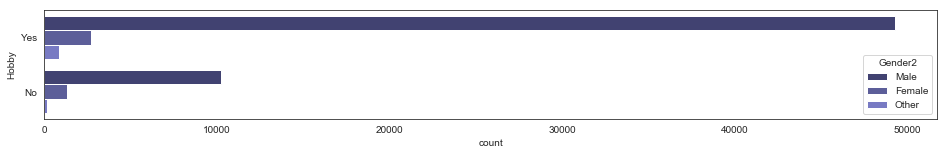

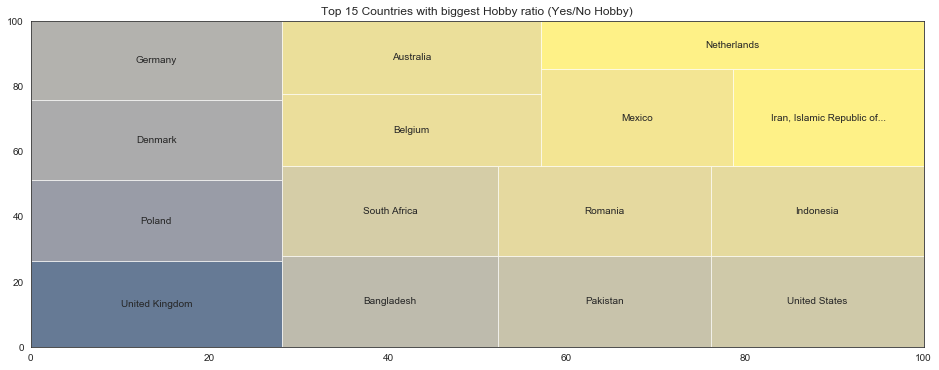

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
c1 = cm.cividis(np.linspace(.3,.86, 2))
my_circle=plt.Circle( (0,0), 0.83, color='white')
names=data['Hobby'].unique().tolist()
size=data['Hobby'].value_counts().tolist()
plt.pie(size, labels=names, colors=c1,autopct='%1.2f%%',startangle=35)
p=plt.gcf()
p.gca().add_artist(my_circle);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
colors = cm.Blues(np.linspace(.51,.96, 2))
colors2 = cm.Blues(np.linspace(.33,.46, 3))
ax[0].axis('equal')
mypie, _ = ax[0].pie(data['Hobby'].value_counts().tolist(), radius=1.2, labels=['Yes', 'No'], colors=colors )
plt.setp( mypie, width=0.32, edgecolor='white')
mypie2, _ = ax[0].pie([49258,2697,835,10200,1328,151], radius=1.3-0.3, labels=['Man','Woman','Other','Man','Woman','Other'], labeldistance=0.7, colors = colors2)
plt.setp( mypie2, width=0.15, edgecolor='white')
plt.margins(0,0)
# show it
plt.suptitle('Coding as Hobby',fontsize=23,fontweight="bold");
plt.show()
plt.figure(figsize=(16,2))
sns.countplot(y='Hobby',data=data,hue='Gender2',palette='tab20b');
h1 = ((data[data['Hobby']=='Yes']['Country'].value_counts()).to_frame().reset_index()).sort_values(by='Country',ascending=False)
h2 = ((data[data['Hobby']=='No']['Country'].value_counts()).to_frame().reset_index()).sort_values(by='Country',ascending=False)
h1['ratio'] = h1['Country']/h2['Country']
h1 = h1[h1.Country>500]
h1 = h1.sort_values(by='ratio',ascending=False)
plt.figure(figsize=(16,6))
norm = matplotlib.colors.Normalize(vmin=min(h1['ratio'].head(15)), vmax=max(h1['ratio'].head(15)))
colors = [matplotlib.cm.cividis_r(norm(value)) for value in h1['ratio']]
squarify.plot(label=h1['index'].head(15),sizes=h1['ratio'].head(15), color = colors, alpha=.6)
plt.title("Top 15 Countries with biggest Hobby ratio (Yes/No Hobby)",fontsize=12);

In [19]:
no_hobby = (data[data['Hobby']=='No']['Age'].value_counts()).reindex(order)/(data[data['Hobby']=='Yes']['Age'].value_counts()).reindex(order)*100

In [23]:
h1.sort_values(by='ratio',ascending=False).head(5)

index  Country  ratio
3   United Kingdom     5054   5.03
8           Poland     1818   4.81
27         Denmark      561   4.71
2          Germany     5454   4.67
26      Bangladesh      573   4.62

In [20]:
trace0 = go.Bar(
    x=order,
    y=(data[data['Hobby']=='No']['Age'].value_counts()).reindex(order).values.tolist(),
    name='No Hobby',
    marker=dict(
        color='rgb(49,130,189)')
    )
trace1 = go.Bar(
    x=order,
    y=(data[data['Hobby']=='Yes']['Age'].value_counts()).reindex(order).values.tolist(),
    name='Hobby',
    marker=dict(
        color='rgb(204,204,204)')
)

trace2 = go.Scatter(
    x=order,
    y=no_hobby.values.tolist(),
    name='NoHobby/Hobby Ratio %',
    xaxis='x1',
    yaxis='y2',
    marker= dict(line= dict(width= 1), 
                           size= 8), 
              line=dict(color= '#B0122C', width= 1.5)
)

        
layout = dict(autosize= False, 
              width= 900, 
              height= 500, 
              title="Hobby vs No Hobby & Hobby Ratio by Age ",
              legend= dict(font=dict(size=10),
              yanchor='top',xanchor='center',orientation='h',x= 0.5, y=1.12
                           
                          ),
              hovermode='x',
              xaxis=dict(tickangle= -45, 
                         autorange=True,
                         tickfont=dict(size= 9), 
                         title= '', 
                         type= 'category'
                        ), 
              yaxis=dict(range= [0, (data[data['Hobby']=='Yes']['Age'].value_counts()).reindex(order).values.max()+2000], #left yaxis
                         showgrid=True, 
                         title= 'Count'
                         ,titlefont=dict(size=11)
                        ), 
              yaxis2=dict(range= [0, no_hobby.max()+5], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'No-Hobby/Hobby Ratio %'
                          ,titlefont=dict(size=11)
                         )
             )

fig = go.Figure(data=[trace0,trace1,trace2], layout=layout)
py.iplot(fig, filename='Hobby ratio')

**We can see that almost 80% of respondents say that coding is their hobby. Both males and females say that.**  
**If we look on coding as hobby ratio per country, we can see that countries with biggest ratio Coding as hobby to no hobby are: UK, Poland, Denmark, Germany, Bangladesh**  
**If we look on Hobby/No Hobby ratio per age groups we can notice that group with biggest ratio are respondents in 55-64 age group, we can also see trend that with increase of age hobby/no hobby ratio raises.**

## Students Responders

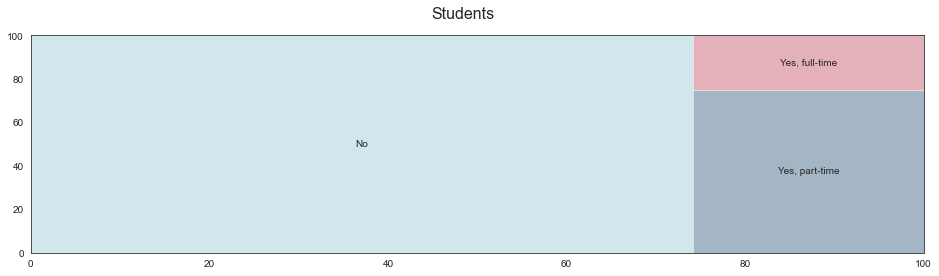

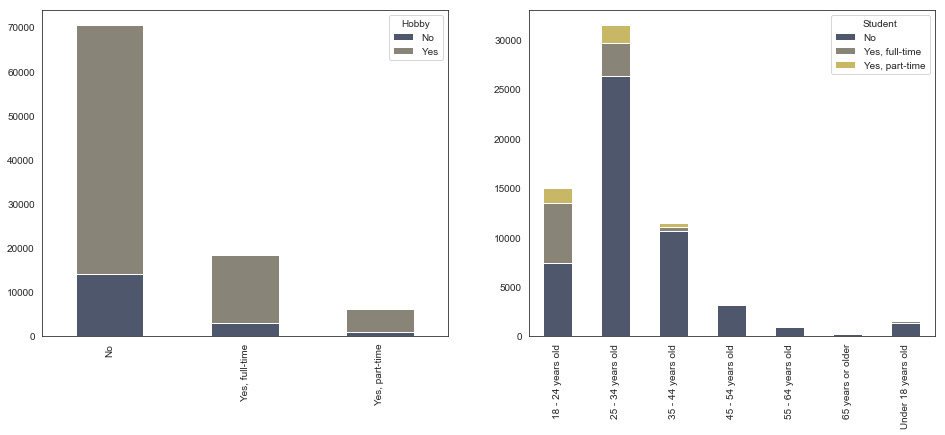

In [25]:
plt.figure(figsize=(16,4))
plt.suptitle('Students',fontsize=16)
squarify.plot(label=data['Student'].dropna().unique().tolist(),sizes=data['Student'].value_counts().tolist(), color=["#87c0cd","#113f67","#BA344C", "grey"], alpha=.38)

f, ax = plt.subplots(1,2,figsize=(16,6))
c3 = cm.cividis(np.linspace(.3,0.8, 3))

g1 = data.groupby(['Student','Hobby'])['Student'].count()
g1 = g1.sort_values(ascending=False)
g1 = pd.DataFrame(g1)
g1 = g1.rename(columns={'Student':'counts'})
g1 = g1.sort_values(by='counts',ascending=True)
g1 = g1.reset_index()
g1 = g1.pivot(index='Student',columns='Hobby',values='counts')
g1.plot(kind='bar',stacked=True,color=c3,ax=ax[0]);

g2 = data.groupby(['Student','Age'])['Student'].count()
g2 = g2.sort_values(ascending=False)
g2 = pd.DataFrame(g2)
g2 = g2.rename(columns={'Student':'counts'})
g2 = g2.sort_values(by='counts',ascending=True)
g2 = g2.reset_index()
g2 = g2.pivot(index='Age',columns='Student',values='counts')
g2.plot(kind='bar',stacked=True,color=c3,ax=ax[1]);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');

In [29]:
data['Student'].value_counts()/sum(data['Student'].value_counts())

No               0.74
Yes, full-time   0.19
Yes, part-time   0.06
Name: Student, dtype: float64

**We can see that almost 75% of responders are not students. 20% are full time students and 5% of responders are part time students. We can also notice that for almost all of the students coding is hobby**

In [33]:
leng = (get_list(data['LanguageWorkedWith'].dropna())[:10]).reindex(index=data.index[::-1])[-10:]
size = np.array(leng[1]*0.0012)[-10:]
leng2 = (get_list(data['LanguageDesireNextYear'].dropna())[:10]).reindex(index=data.index[::-1])[-10:]
size2 = np.array(leng2[1]*0.0012)[-10:]

#2018 rok

trace3 = go.Scatter(x=leng[0],y=leng[1],mode='markers',marker = dict(color = random_colors(10), size=size),name='LanguageWorkedWith')
data_t = go.Data([trace3])
layout = go.Layout(title="LanguageWorkedWith", 
                   
    width=960,
    height=500,
    hovermode='closest',
        xaxis = dict(
         tickangle=20,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            
            size=12,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True)
                  
                  )
figure=go.Figure(data=data_t,layout=layout)
py.iplot(figure)

# 2019 rok
trace4 = go.Scatter(x=leng2[0],y=leng2[1],mode='markers',marker = dict(color = random_colors(10), size=size2),name='LanguageDesireNextYear')
data_t = go.Data([trace4])
layout = go.Layout(title="LanguageDesireNextYear", 
    width=960,
    height=500,
    hovermode='closest',
        xaxis = dict(
         tickangle=20,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            
            size=12,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=False,
        showline=True)                 
                  )
figure=go.Figure(data=data_t,layout=layout)
py.iplot(figure)


## Education

In [21]:
data['Education'].value_counts()/data['Education'].shape[0]

Bachelor’s degree     0.44
Master’s degree       0.22
College - no degree   0.12
Secondary school      0.09
No info               0.04
Associate             0.03
Doctoral              0.02
Primary school        0.02
Professional          0.01
No formal education   0.01
Name: Education, dtype: float64

In [22]:
data['Undergrad'].value_counts()/data['Undergrad'].shape[0]

Computer Science       0.51
Other                  0.21
Engineering (Other)    0.07
Information systems    0.07
Natural Science        0.03
Humanities & Socials   0.03
Maths & Stats          0.03
Web dev                0.02
Business               0.02
Arts                   0.01
Name: Undergrad, dtype: float64

In [23]:
labels = data['Education'].value_counts().index.tolist()
values = data['Education'].value_counts().values.tolist()
labels2 = data['Undergrad'].value_counts().index.tolist()
values2 = data['Undergrad'].value_counts().values.tolist()

fig = {
  "data": [
    {
      "values": values,
      "labels": labels,
      "textposition":"inside",
      "domain": {"column": 0},
      "name": "Formal Education",
      "hoverinfo":"label+percent",
      "hole": .85,
      "type": "pie"
    },
    {
      "values": values2,
      "labels": labels2,
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "Field of study",
      "hoverinfo":"label+percent",
      "hole": .85,
      "type": "pie"
    }],
  "layout": {
        "title":"Formal Education & Main Field of study",
          'showlegend': False,
      'width':960,
      #'height':600,
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Formal Education",
                "x": 0.13,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Field of study",
                "x": 0.85,
                "y": 0.5
            }
            
        ]
    }
}
py.iplot(fig, filename='donut')
table1 = ff.create_table(pd.DataFrame(data['Education'].value_counts()).reset_index().rename(columns={'index':'Formal Education','Education':'Count'}),
                       height_constant=10)
table1.layout.width=950
py.iplot(table1)
table2 = ff.create_table(pd.DataFrame(data['Undergrad'].value_counts()).reset_index().rename(columns={'index':'Field of study','Undergrad':'Count'}),
                       height_constant=10)
table2.layout.width=950
py.iplot(table2)

## Wielkość firmy

In [24]:
comp = (get_list(data['CompanySize'].dropna())).reindex(index=data.index[::-1])[-8:]
comp_size = np.array(comp[1]*0.006)[-8:]
trace1 = go.Scatter(x=comp[0],y=comp[1],mode='markers',marker = dict(color = random_colors(8), size=comp_size),name='CompanySize')
data_t = go.Data([trace1])
layout = go.Layout(title="Company size", 
    width=960,
    height=500,
    hovermode='closest',
        xaxis = go.layout.XAxis(
         tickangle=20,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            
            size=11,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True)
                  
                  )
figure=go.Figure(data=data_t,layout=layout)
py.iplot(figure)
table1 = ff.create_table(pd.DataFrame(data['CompanySize'].value_counts()).reset_index().rename(columns={'index':'CompanySize','CompanySize':'Count'}),
                       height_constant=10)
table1.layout.width=950
py.iplot(table1)

In [25]:
df0 = pd.DataFrame(data.groupby(['Student','Employment'])["Student"].count()).rename(columns={'Student':'Count'}).reset_index()
df0 = pd.pivot_table(df0,index=["Employment"],values=["Count"],columns=['Student'])
df0.sort_values(by=('Count','No'),ascending=False)

Count                              
Student                               No Yes, full-time Yes, part-time
Employment                                                            
Full-time job                      57476           8259           3823
Freelancer/SelfEmployed             6915           1624            526
Unemployed (looking for work)       2250           2971            406
Unemployed (not looking for work)   1800           2099            122
Part-time job                       1219           2912           1163
Other                                546            516             57
Retired                              193             13             11

In [26]:
labels_e = data[data['Student']=='No']["Employment"].value_counts().index.tolist()
values_e = data[data['Student']=='No']["Employment"].value_counts().values.tolist()
labels2_e = data[data['Student']!='No']["Employment"].value_counts().index.tolist()
values2_e = data[data['Student']!='No']["Employment"].value_counts().values.tolist()

fig = {
  "data": [
    {
      "values": values_e,
      "labels": labels_e,
      "textposition":"inside",
      "domain": {"column": 0},
      "name": "Not Students",
      "hoverinfo":"label+percent",
      "hole": .85,
      "type": "pie"
    },
    {
      "values": values2_e,
      "labels": labels2_e,
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "Students",
      "hoverinfo":"label+percent",
      "hole": .85,
      "type": "pie"
    }],
  "layout": {
        "title":"Not Students & Students Employment type",
      'legend':dict(font=dict(size=10),
              yanchor='top',xanchor='center',orientation='h',x= 0.5, y=-0.1
                           
                          ),
          'showlegend': True,
      'width':960,
      'height':680,
      
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 31
                },
                "showarrow": False,
                "text": "Not Students",
                "x": 0.10,
                "y": 0.5
            },
            {
                "font": {
                    "size": 31
                },
                "showarrow": False,
                "text": "Students",
                "x": 0.85,
                "y": 0.5
            }
            
        ]
    }
}
py.iplot(fig, filename='donut')
trace5 = go.Bar(x=labels_e,
    y=values_e,
    name='Not Students',
    marker=dict(
        color='#3A506B')
    )
trace6 = go.Bar(
    x=labels2_e,
    y=values2_e,
    name='Students',
    marker=dict(
        color='#5BC0BE'))
layout2 = go.Layout(title="Employment type", 
                    
                    legend=dict(font=dict(size=10),
              yanchor='top',xanchor='center',orientation='h',x= 0.5, y=-0.1
                           
                          ),
    width=960,
    height=500,
    hovermode='closest',
        xaxis = go.layout.XAxis(
         tickangle=0,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            
            size=7,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True)
                  
                  )

fig2 = go.Figure(data=[trace5,trace6], layout=layout2)
py.iplot(fig2, filename='Studs')


## Years of coding

In [27]:
yrs = []
for i in data['YearsCoding'].value_counts().index.tolist():
    yrs.append(i[:-6])
yrs[7] = '30+'

In [28]:
trace9 = go.Bar(x=yrs,
    y=data['YearsCoding'].value_counts().values.tolist(),
    name='Years',
                marker=dict(
        color='#3A506B'),
    text=[str(round(i/93835*100,2))+' %' for i in data['YearsCoding'].value_counts().values.tolist()],
               textposition = 'auto',textfont=dict(
        family='arial',
        size=12,
        color='#E0C1B3'
    ))

layout3 = go.Layout(title="Years of Coding",                     
    width=960,height=500,hovermode='closest',
    xaxis = go.layout.XAxis(
            tickangle=0,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            size=12,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True)
                    ,showlegend= True
                  
                  )
fig3 = go.Figure(data=[trace9], layout=layout3)
py.iplot(fig3, filename='Studs')
table3 = ff.create_table(pd.DataFrame(data['YearsCoding'].value_counts()).reset_index().rename(columns={'index':'YearsCoding','YearsCoding':'Count'}),
                       height_constant=10)
table3.layout.width=950
py.iplot(table3)

## Typ Developera

In [29]:
data['DevType'].value_counts()[:5]

Back-end developer                                             6417
Full-stack developer                                           6104
Back-end developer;Front-end developer;Full-stack developer    4460
Mobile developer                                               3518
Student                                                        3222
Name: DevType, dtype: int64

In [30]:
tuple_of_devtypes = Counter((";".join(data['DevType'].dropna())).split(";")).most_common()
dev_types = (pd.DataFrame(tuple_of_devtypes))[:-1]

tuple_of_devtypes_female = Counter((";".join(data[data['Gender']=='Female']['DevType'].dropna())).split(";")).most_common()
dev_types_female = (pd.DataFrame(tuple_of_devtypes_female))[:-1]

tuple_of_devtypes_male = Counter((";".join(data[data['Gender']=='Male']['DevType'].dropna())).split(";")).most_common()
dev_types_male = (pd.DataFrame(tuple_of_devtypes_male))[:-1]

In [31]:
dev_types

0      1
0                              Back-end developer  53300
1                            Full-stack developer  44353
2                             Front-end developer  34822
3                                Mobile developer  18804
4    Desktop or enterprise applications developer  15807
5                                         Student  15732
6                          Database administrator  13216
7                                        Designer  12019
8                            System administrator  10375
9                               DevOps specialist   9549
10                       Data or business analyst   7559
11  Data scientist or machine learning specialist   7088
12                           QA or test developer   6194
13                            Engineering manager   5256
14     Embedded applications or devices developer   4819
15                     Game or graphics developer   4642
16                                Product manager   4316
17                Educator or academic researcher   3641
18             C-suite executive (CEO, CTO, etc.)   3491

In [32]:
trace11 = go.Bar(
            x=dev_types_male[1],
            y=dev_types_male[0],
            orientation = 'h',
            #marker=dict(color=random_colors(20), line=dict(color='rgb(8,48,107)',width=1.5,)),
          marker=dict(color='rgb(0, 0, 100)',line=dict(color='rgb(8,48,107)',width=1.1)),
            opacity = 0.7, name='Male')

trace12 = go.Bar(
            x=dev_types_female[1],
            y=dev_types_female[0],
            orientation = 'h',
            #marker=dict(color=random_colors(20), line=dict(color='rgb(8,48,107)',width=1.5,)),
marker=dict(color='rgb(0, 200, 200)',line=dict(color='rgb(8,48,107)',width=1.1)),
            opacity = 0.9, name='Female'
        )


layout5 = go.Layout(title="Developer Type",                     
    width=960,height=500,hovermode='closest',barmode='stack',
                    margin=go.Margin(
    l=300,
    r=10, b=0),
    xaxis = go.layout.XAxis(
            tickangle=0,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            size=12,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True)
                  
                 )
fig5 = go.Figure(data=[trace11,trace12], layout=layout5)
py.iplot(fig5, filename='Dev_Type')

tracex = go.Table(columnwidth = [500,200],
    header=dict(values=['DeveloperType', 'Count'],line = dict(color = '#506784'),
    fill = dict(color='rgb(0, 0, 100)'),align=['center','center'],font = dict(color = 'white', size = 10),height = 22),
    cells=dict(values=[(pd.DataFrame(dev_types.rename(columns={0:'Developer Type',1:'Count'})))['Developer Type'].tolist(),
                       (pd.DataFrame(dev_types.rename(columns={0:'Developer Type',1:'Count'})))['Count'].tolist()],align = ['center','center'],font = dict(size = 10)))

layout6 = go.Layout(title="",                     
    width=960,height=450,hovermode='closest',barmode='stack',
                    margin=go.Margin(l=10,r=10, b=10,t=35))

fig6 = go.Figure(data=[tracex], layout=layout6)
py.iplot(fig6, filename='tab')


## Salary In-Depth Analysis

In [33]:
st = get_list(data['SalaryType'].dropna()).reset_index()
txt1=[str(round(i/51070*100,2))+' %' for i in data['SalaryType'].value_counts().values.tolist()]
tracest = go.Bar(x=st[1],y=st[0],orientation = 'h',
          marker=dict(color='#3A506B',line=dict(color='rgb(8,48,107)',width=1.1)), 
        text=txt1,textposition = 'auto',textfont=dict(
        family='arial',
        size=12,
        color='#E0C1B3'),
          opacity = 0.87, name='Salary Type')

layoutst = go.Layout(title="Salary Type",                     
    width=960,height=400,hovermode='closest',
    xaxis = go.layout.XAxis(
            tickangle=0,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            size=12,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True))

figst = go.Figure(data=[tracest], layout=layoutst)
py.iplot(figst, filename='Salary Type')

In [34]:
data['ConvertedSalary'].describe()

count     47702.00
mean      95780.86
std      202348.22
min           0.00
25%       23844.00
50%       55075.00
75%       93000.00
max     2000000.00
Name: ConvertedSalary, dtype: float64

In [35]:
q1,q3 = data['ConvertedSalary'].quantile(0.25),data['ConvertedSalary'].quantile(0.75)


dt1 = go.Histogram(x=data[data['ConvertedSalary']<=1000000]['ConvertedSalary'],
                   name='Salary < 1kk',nbinsx = 100,marker=dict(color='#3A506B',line=dict(color='rgb(8,48,107)',width=1.1)))
dt2 = go.Histogram(x=data[data['ConvertedSalary']<=q3]['ConvertedSalary'],
                   name='Salary < quantile 75%',nbinsx = 50,marker=dict(colorscale='YlOrRd',line=dict(color='#F2F5EA',width=0.71)))

ly= go.Layout(title="Annual Salary in USD",                     
    width=960,height=700,hovermode='closest',
    xaxis = go.layout.XAxis(
            tickangle=0,
            showline=False,
            zeroline=False,
            showgrid=False,
            tickfont=dict(
            size=12,
            color='black'
        )
    ), yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        showline=True))


figs = tools.make_subplots(rows=2, cols=1,print_grid=False)
figs.append_trace(dt1, 1, 1)
figs.append_trace(dt2, 2, 1)
figs.layout.update(ly)

py.iplot(figs)

In [36]:
cntr = countries.head(20)['index'].tolist()
top_data = data[data['Country'].isin(cntr)]
mean_salary = top_data[(top_data['Gender2']=='Female') | (top_data['Gender2']=='Male')].groupby(['Country','Gender2'])['ConvertedSalary'].mean().reset_index()
ml,fml = mean_salary[mean_salary['Gender2']=='Male'].ConvertedSalary,mean_salary[mean_salary['Gender2']=='Female'].ConvertedSalary

In [37]:
# country = cntr
# voting_pop = ml.to_list()
# reg_voters = fml.to_list()

mmm1 = go.Scatter(
    x=ml.to_list(),
    y=cntr,
    mode='markers',
    name='Male',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=22,
    )
)
fff1 = go.Scatter(
    x=fml.to_list(),
    y=cntr,
    mode='markers',
    name='Female',
    marker=dict(
        color='#FE938C',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=22,
    )
)

dataml = [mmm1, fff1]
layoutx = go.Layout(
    title="Average Annual Salary From Top 30 Countries Male Vs Female",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=True,
        #dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=120,
        #r=10,
        b=30,
        t=40
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='top',
        xanchor='center',
        orientation='h',x= 0.5, y=-0.1
    ),  
    width=960,
    height=680,
    hovermode='closest',
)
figml = go.Figure(data=dataml, layout=layoutx)
py.iplot(figml, filename='lowest-oecd-votes-cast')

In [38]:
# data['ConvertedSalary']
# Dystrybucja na kraj (podział na płeć)
# Dystrybucja na kraj
# Przeciętne zarobki wg. Dev Type
# Zarobki wg. Wieku
# Zarobki wg. technologii
# Zarobki wg. lat kodowania
# Zarobki wg. edukacji
# Zarobki wg. wielkości firmy

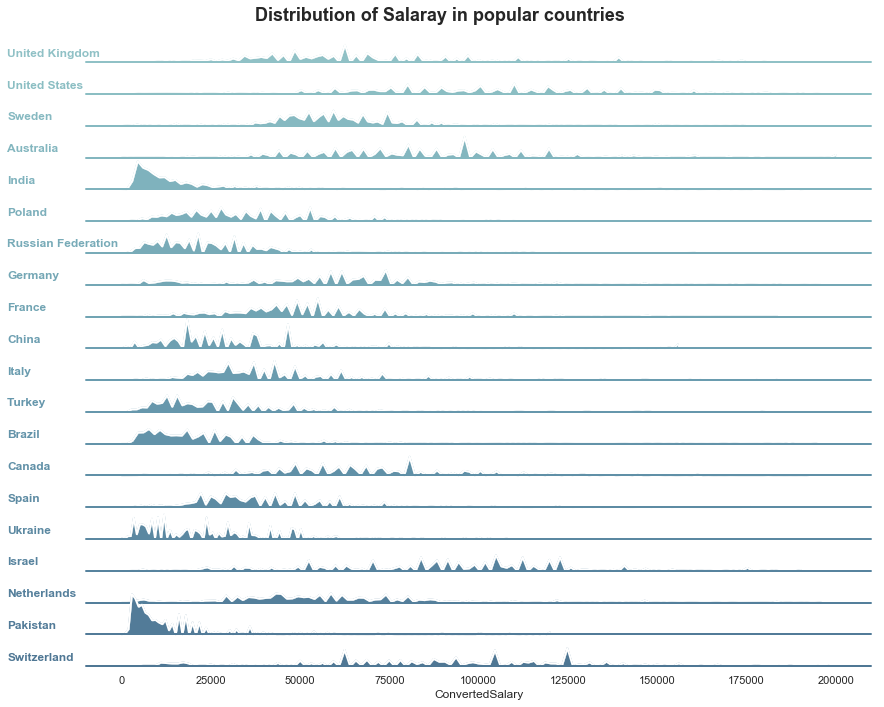

In [39]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
data_a1 = data[(data['ConvertedSalary']<200000) & (data['ConvertedSalary']>10)]
ctd = data_a1[data_a1['Country'].isin(cntr)]
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(40, rot=-.25, light=.7)
g = sns.FacetGrid(ctd, row="Country", hue="Country", aspect=25, height=0.5, palette=pal)

g.map(sns.kdeplot, "ConvertedSalary", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "ConvertedSalary", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "ConvertedSalary")
g.fig.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.suptitle('Distribution of Salaray in popular countries',fontsize=18,fontweight="bold");

In [40]:
data['DevType2'] = data['DevType'].str.split(';').str[0]

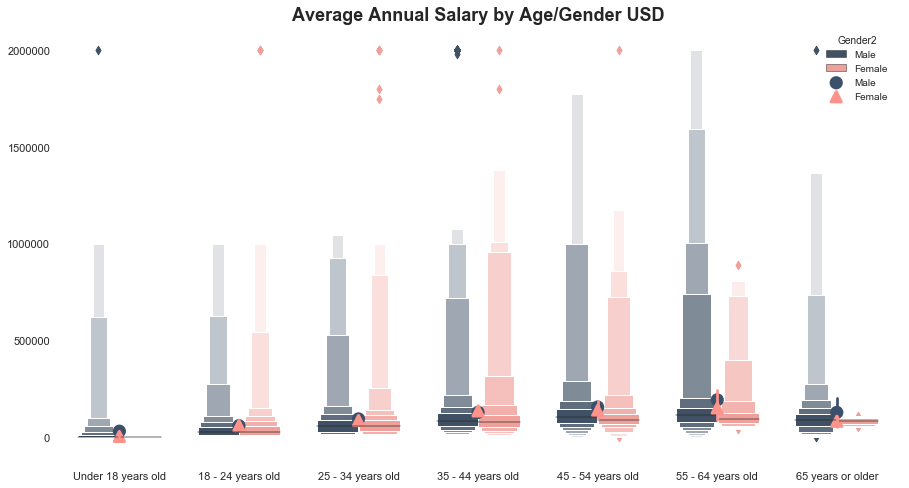

In [41]:
sns.set(style="white", rc={"axes.facecolor": "white" ,"legend.frameon":False,"legend.fontsize":'small'} )
plt.figure(figsize=(15,8))
ax = sns.boxenplot(x='Age',y='ConvertedSalary',data=data[data['Gender2'].isin(['Male','Female'])],
               hue='Gender2',palette=['#3A506B','#FE938C'],width=0.7,order=order,scale="linear",outlier_prop=0.03,linewidth=1);
ax2 = sns.pointplot(x='Age',y='ConvertedSalary',data=data[data['Gender2'].isin(['Male','Female'])],
               hue='Gender2',palette=['#3A506B','#FE938C'],order=order,dodge=False,markers=['o','^'],join=False,scale=1.5)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
ax.set_title('Average Annual Salary by Age/Gender USD',fontsize=18,fontweight="bold");

In [42]:
data[data['Gender2'].isin(['Male','Female'])].groupby(['Age','Gender2'])['ConvertedSalary'].agg(['mean'])

mean
Age                Gender2          
18 - 24 years old  Female   58016.12
                   Male     57736.10
25 - 34 years old  Female   84601.05
                   Male     92902.69
35 - 44 years old  Female  134410.12
                   Male    126873.92
45 - 54 years old  Female  136721.42
                   Male    154352.83
55 - 64 years old  Female  148156.37
                   Male    191398.20
65 years or older  Female   80701.50
                   Male    126561.78
Under 18 years old Female    2088.80
                   Male     29321.20

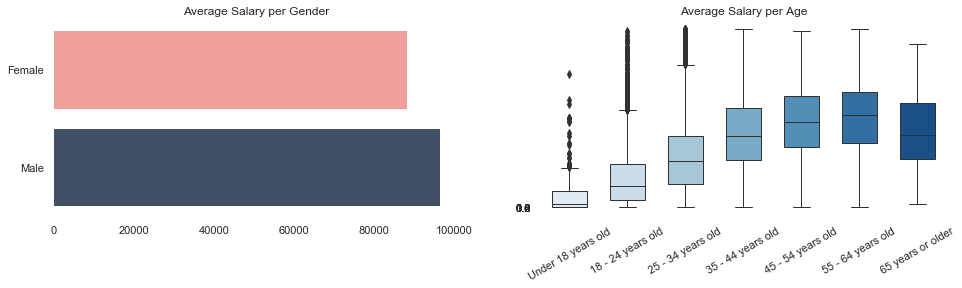

In [43]:
f,ax = plt.subplots(1,2,figsize=(16,3.6))
data_s = pd.DataFrame(data[data['Gender2'].isin(['Male','Female'])].groupby(['Gender2'])['ConvertedSalary'].mean()).reset_index()
#plt.figure(figsize=(15,2))
ax3 = sns.barplot(y='Gender2',x='ConvertedSalary',data=data_s,palette=['#FE938C','#3A506B'] ,ax=ax[0]).set_title('Average Salary per Gender')
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.xticks(np.arange(0, 105000, 5000.0));
ax4 = sns.boxplot(x='Age',y='ConvertedSalary',data = data[(data['ConvertedSalary']<200000) & (data['ConvertedSalary']>10)],
                  palette='Blues',order=order,width=0.6,linewidth=1).set_title('Average Salary per Age')
plt.xticks(rotation=30);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');

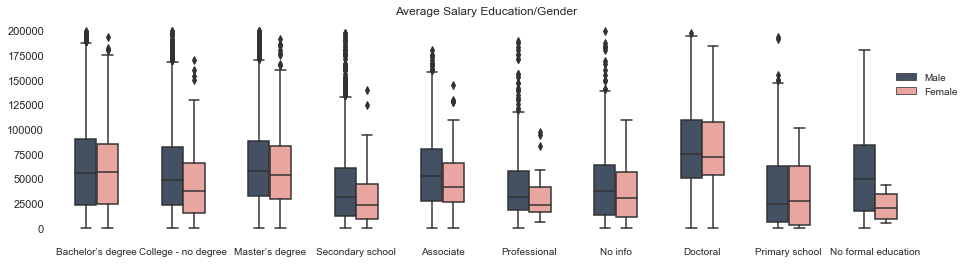

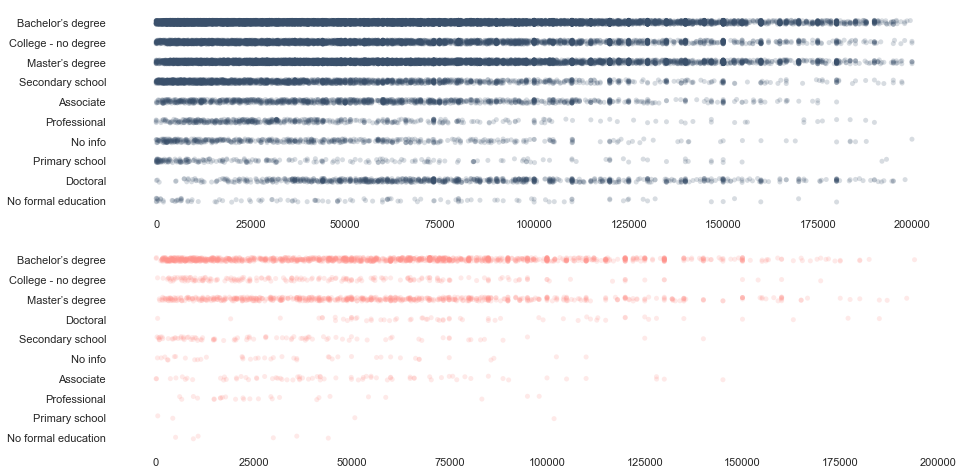

In [44]:
data_a1 = data[(data['ConvertedSalary']<200000) & (data['ConvertedSalary']>10)]
plt.figure(figsize=(15.5,4))
ax5 = sns.boxplot(x='Education',y='ConvertedSalary',data = data_a1[data_a1['Gender2'].isin(['Male','Female'])],
                  hue='Gender2',palette=['#3A506B','#FE938C'],width=0.5,saturation=0.63,
                 ).set_title('Average Salary Education/Gender')
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.legend(loc='upper center', bbox_to_anchor=(1.01, 0.8), shadow=True, ncol=1)
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.xticks(fontsize=10)
f,ax = plt.subplots(2,1,figsize=(15,8))
st1 = sns.stripplot(y='Education',x='ConvertedSalary',data = data_a1[data_a1['Gender2'].isin(['Male'])],
                   jitter=True, 
                   marker='o', 
                   alpha=0.2,
                   color='#3A506B',ax=ax[0])
st2 = sns.stripplot(y='Education',x='ConvertedSalary',data = data_a1[data_a1['Gender2'].isin(['Female'])],
                   jitter=True, 
                   marker='o', 
                   alpha=0.2,
                   color='#FE938C',ax=ax[1])
#plt.yticks('')
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');

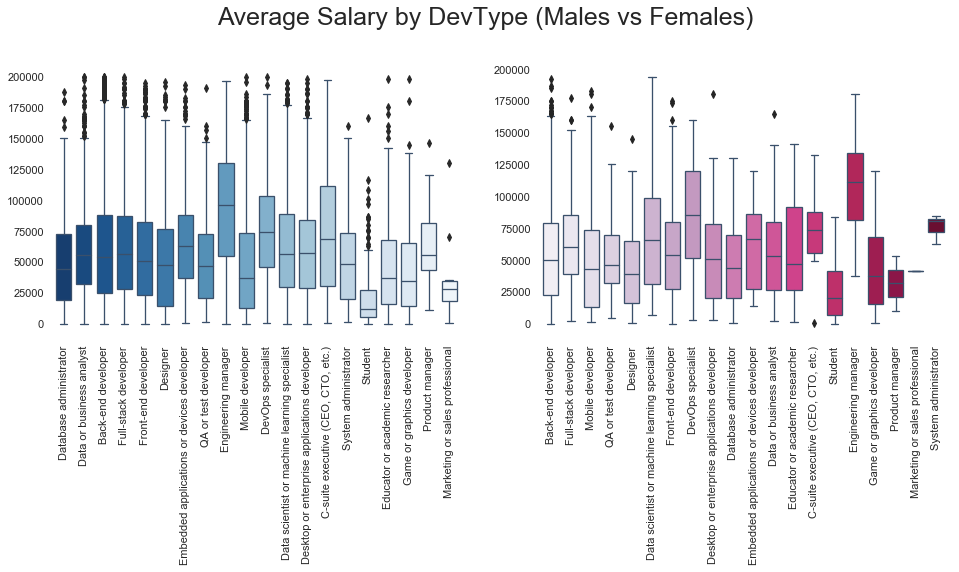

In [45]:
boxprops = {'edgecolor': '#3A506B', 'linewidth': 1.3}
lineprops = {'color': '#3A506B', 'linewidth': 1.3}
boxplot_kwargs = {'boxprops': boxprops, 'medianprops': lineprops,
                  'whiskerprops': lineprops, 'capprops': lineprops}
stripplot_kwargs = {'linewidth': 0.6, 'size': 6, 'alpha': 0.7}

f,ax = plt.subplots(1,2,figsize=(16,5));
ax6 = sns.boxplot(x='DevType2',y='ConvertedSalary',data = data_a1[data_a1['Gender2'].isin(['Male'])],
                  palette='Blues_r',width=0.75,linewidth=1.3,ax=ax[0],**boxplot_kwargs
                 )
plt.xticks(rotation='90')
ax7 = sns.boxplot(x='DevType2',y='ConvertedSalary',data = data_a1[data_a1['Gender2'].isin(['Female'])],
                  palette='PuRd',width=0.75,linewidth=1.3,ax=ax[1],**boxplot_kwargs
                 )
plt.xticks(rotation='90')
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90);
plt.suptitle('Average Salary by DevType (Males vs Females)',fontsize=25,y=1.04);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)

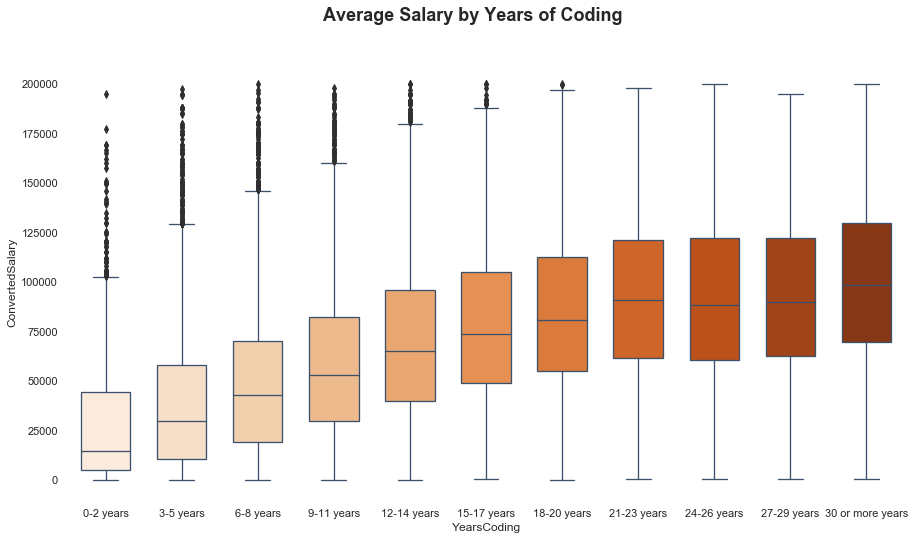

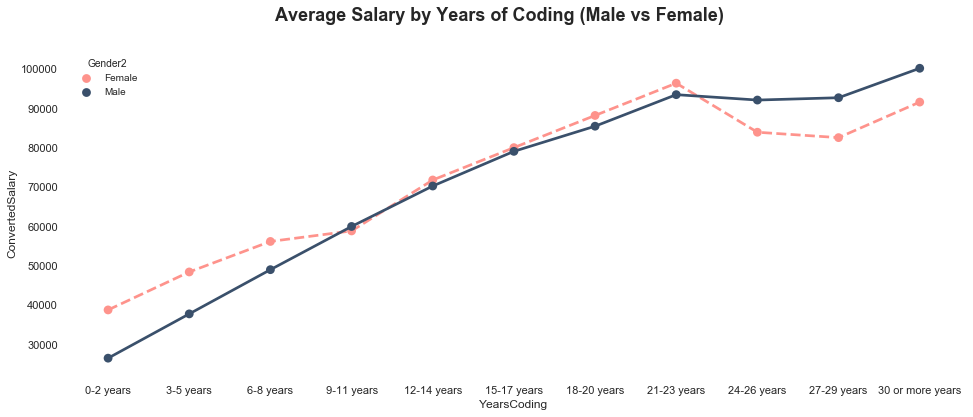

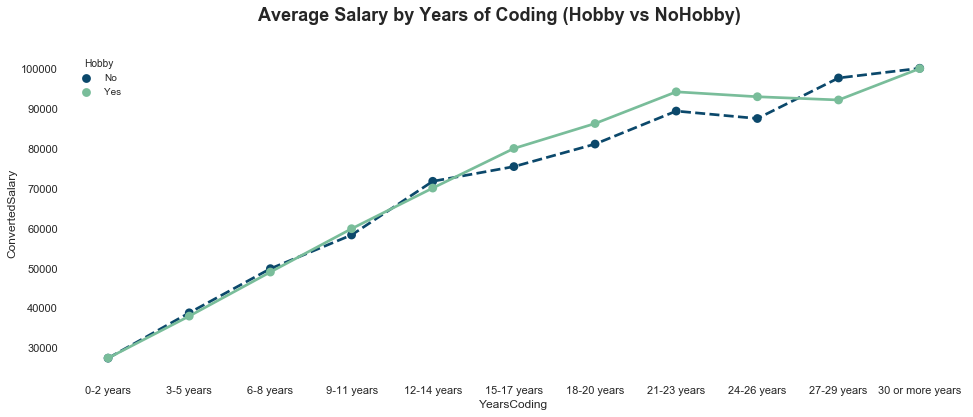

In [46]:
plt.figure(figsize=(15,8))
years_order = ['0-2 years','3-5 years', '6-8 years','9-11 years','12-14 years','15-17 years','18-20 years','21-23 years',
               '24-26 years','27-29 years','30 or more years']
sns.boxplot(x='YearsCoding',y='ConvertedSalary',data = data_a1,
                  palette='Oranges',width=0.65,linewidth=1.4,**boxplot_kwargs,order=years_order)
plt.suptitle('Average Salary by Years of Coding',fontsize=18,fontweight="bold");
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.figure(figsize=(16,6))
salary_avg=(pd.DataFrame(
    data_a1[data_a1['Gender2'].isin(['Male','Female'])].groupby(['YearsCoding','Gender2'])['ConvertedSalary'].mean()).reset_index())
sns.pointplot(x='YearsCoding',y='ConvertedSalary',
              data=salary_avg,order=years_order,hue='Gender2',palette=['#FE938C','#3A506B'],markers=["o", "o"],linestyles=["--", "-"])
plt.suptitle('Average Salary by Years of Coding (Male vs Female)',fontsize=18,fontweight="bold");
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.figure(figsize=(16,6))
salary_hobby=(pd.DataFrame(
    data_a1.groupby(['Hobby','YearsCoding'])['ConvertedSalary'].mean().reset_index()))
sns.pointplot(x='YearsCoding',y='ConvertedSalary',
              data=salary_hobby,order=years_order,hue='Hobby',palette=['#0B486B','#79BD9A'],markers=["o", "o"],linestyles=["--", "-"])
plt.suptitle('Average Salary by Years of Coding (Hobby vs NoHobby)',fontsize=18,fontweight="bold");
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)

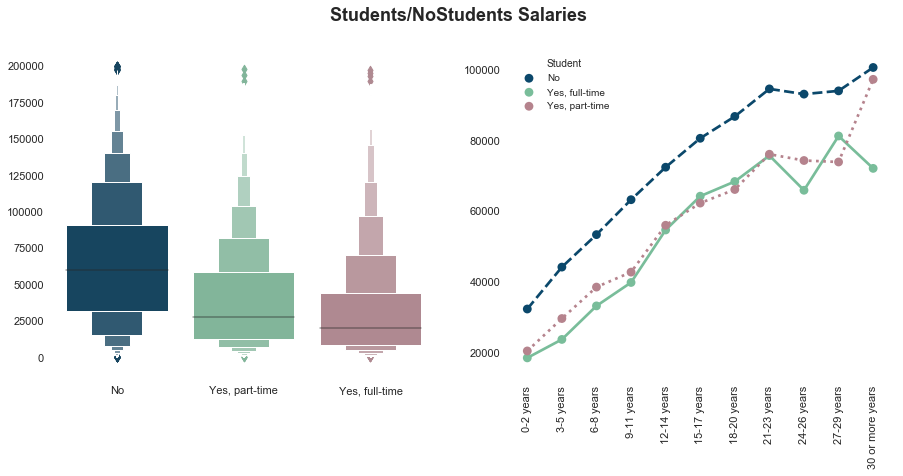

In [47]:
f,ax = plt.subplots(1,2,figsize=(15,6))

ax9 = sns.boxenplot(x='Student',y='ConvertedSalary',data=data_a1,palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[0])


stud_sal=(pd.DataFrame(
    data_a1.groupby(['Student','YearsCoding'])['ConvertedSalary'].mean().reset_index()))
ax10 = sns.pointplot(x='YearsCoding',y='ConvertedSalary',
              data=stud_sal,order=years_order,hue='Student',palette=['#0B486B','#79BD9A','#B5838D'],markers=["o", "o",'o'],linestyles=["--", "-",':'],ax=ax[1])
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.xticks(rotation=90);
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
plt.suptitle('Students/NoStudents Salaries',fontsize=18,fontweight="bold");

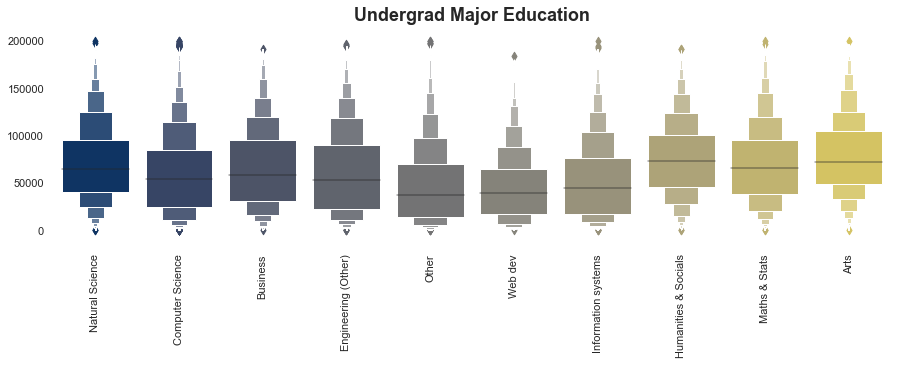

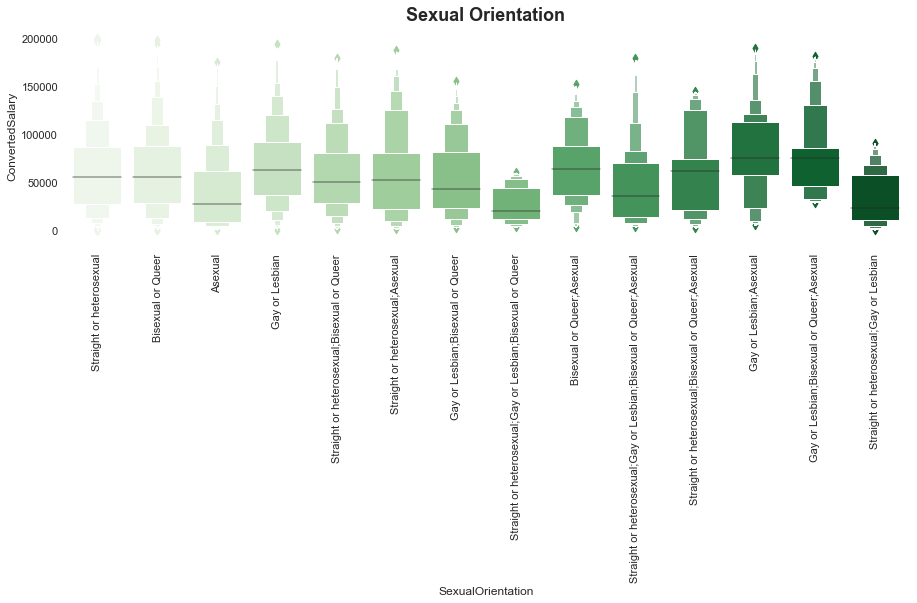

In [48]:
plt.figure(figsize=(15,4))
sns.boxenplot(x='Undergrad',y='ConvertedSalary',data=data_a1,palette='cividis')
plt.title('Undergrad Major Education',fontsize=18,fontweight="bold")
plt.setp(plt.gcf().get_axes(), xlabel='', ylabel='');
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
plt.xticks(rotation=90);
plt.figure(figsize=(15,4))
sns.boxenplot(x='SexualOrientation',y='ConvertedSalary',data=data_a1,palette='Greens')
plt.title('Sexual Orientation',fontsize=18,fontweight="bold")
plt.xticks(rotation=90);
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=True)
